In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
titanic_df = pd.concat([df_train,df_test], ignore_index=True, sort=False)

In [3]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
titanic_df.shape

(1309, 12)

In [5]:
titanic_df.drop(['PassengerId'],axis=1,inplace=True)

# Exploratory Data Analysis

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


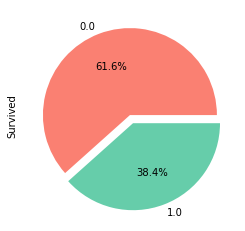

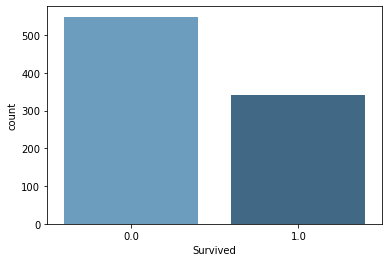

In [7]:
titanic_df['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               colors = ['salmon', 'mediumaquamarine'])
plt.show()

sns.countplot('Survived', data = titanic_df, palette='Blues_d')
plt.show()

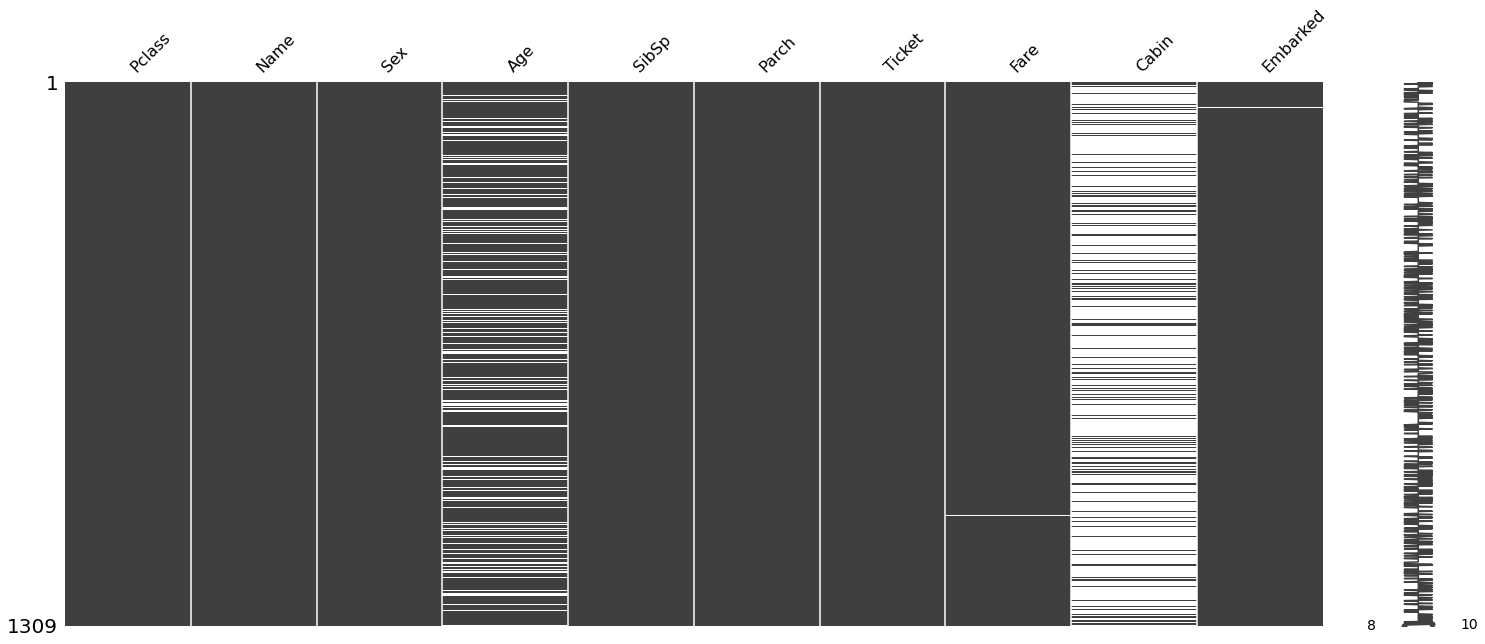

In [8]:
msno.matrix(titanic_df.drop(['Survived'],axis=1))
plt.show()

In [9]:
titanic_df.drop(['Survived'],axis=1).isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

## Checking Features

In [10]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
titanic_df['Cabin'].isnull().sum()

1014

### Has Cabin

In [80]:
titanic_df['Has_Cabin'] = titanic_df['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

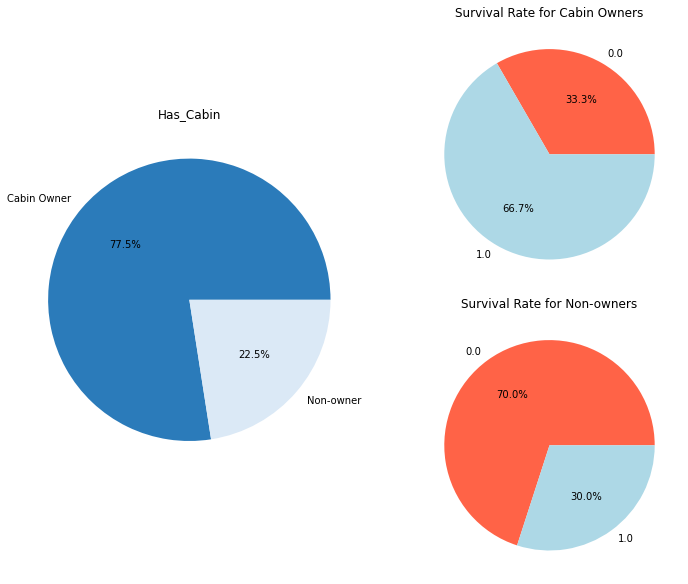

In [81]:
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 3)
f1_ax1 = fig.add_subplot(gs[:, 0])
f1_ax1.set_title('Has_Cabin')
f1_ax2 = fig.add_subplot(gs[0, 1])
f1_ax2.set_title('Survival Rate for Cabin Owners')
f1_ax3 = fig.add_subplot(gs[1, 1])
f1_ax3.set_title('Survival Rate for Non-owners')

colors = [sns.color_palette('Blues_r')[1],sns.color_palette('Blues_r')[-1]]
colors2 = ["tomato","lightblue"]

has_cabin_data = titanic_df['Has_Cabin'].value_counts().sort_index()
f1_ax1.pie(has_cabin_data.values,labels=["Cabin Owner","Non-owner"],autopct='%1.1f%%',colors = colors)

cabin_owner_data = titanic_df[titanic_df['Has_Cabin'] == 1]["Survived"].value_counts().sort_index()
f1_ax2.pie(cabin_owner_data.values,labels=cabin_owner_data.index,autopct='%1.1f%%', colors = colors2)

cabin_nonowner_data = titanic_df[titanic_df['Has_Cabin'] == 0]["Survived"].value_counts().sort_index()
f1_ax3.pie(cabin_nonowner_data.values,labels=cabin_nonowner_data.index,autopct='%1.1f%%', colors = colors2)

plt.show()

### Cabin Label

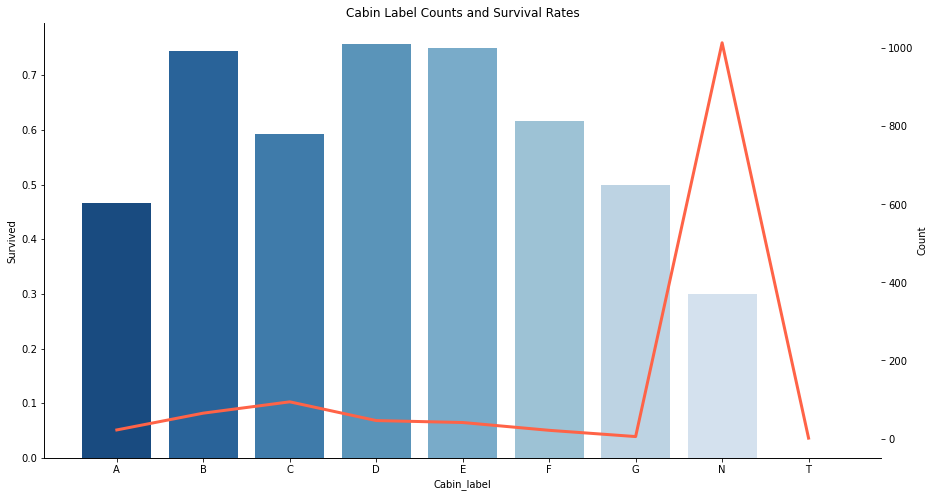

In [135]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('N')
titanic_df['Cabin_label'] = titanic_df['Cabin'].str.get(0)

labels_count_df = titanic_df['Cabin_label'].value_counts().sort_index().reset_index()
labels_df = titanic_df[["Cabin_label","Survived"]].sort_values(by="Cabin_label").reset_index(drop=True)

ax = sns.barplot(x = 'Cabin_label', y = 'Survived', data = labels_df, palette = 'Blues_r',ci=False)
ax2 = ax.twinx()
sns.lineplot(data=labels_count_df, x="index", y="Cabin_label",ax=ax2, color = "tomato",linewidth = 3)
plt.ylabel("Count")
plt.title("Cabin Label Counts and Survival Rates")
sns.despine()

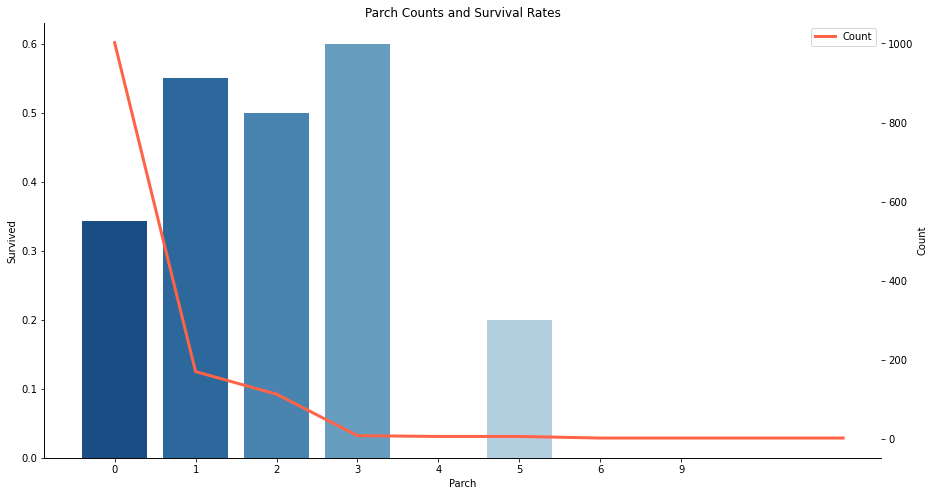

In [134]:
parch_count_df = titanic_df['Parch'].value_counts().sort_index().reset_index()
labels_df = titanic_df[["Parch","Survived"]].sort_values(by="Parch").reset_index(drop=True)

ax = sns.barplot(x = 'Parch', y = 'Survived', data = labels_df, palette = 'Blues_r',ci=False)
ax2 = ax.twinx()
sns.lineplot(data=parch_count_df, x="index", y="Parch",ax=ax2, color = "tomato",linewidth = 3)
plt.ylabel("Count")
plt.title("Parch Counts and Survival Rates")
plt.legend(labels=['Count'])
sns.despine()

### SibSp ( Number of siblings/spouses )

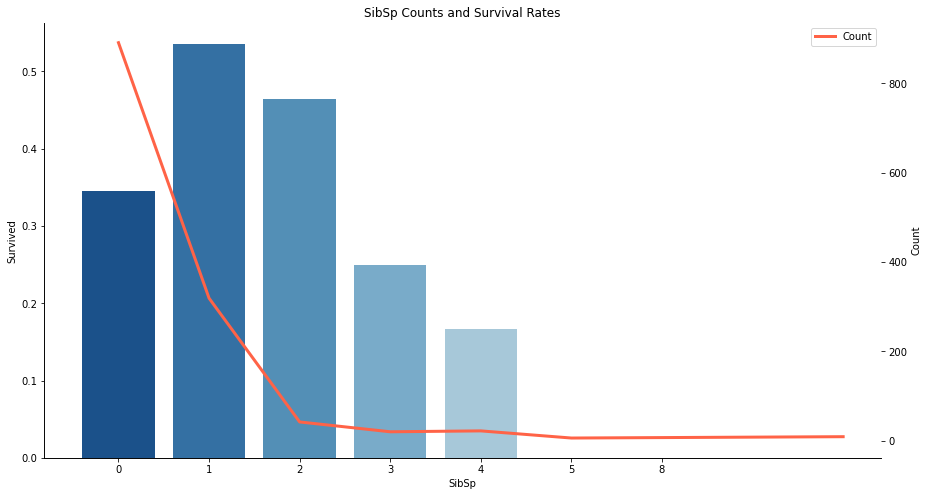

In [136]:
sibsp_count_df = titanic_df['SibSp'].value_counts().sort_index().reset_index()
labels_df = titanic_df[["SibSp","Survived"]].sort_values(by="SibSp").reset_index(drop=True)

ax = sns.barplot(x = 'SibSp', y = 'Survived', data = labels_df, palette = 'Blues_r',ci=False)
ax2 = ax.twinx()
sns.lineplot(data=sibsp_count_df, x="index", y="SibSp",ax=ax2, color = "tomato",linewidth = 3)
plt.ylabel("Count")
plt.title("SibSp Counts and Survival Rates")
plt.legend(labels=['Count'])
sns.despine()

### Family Size

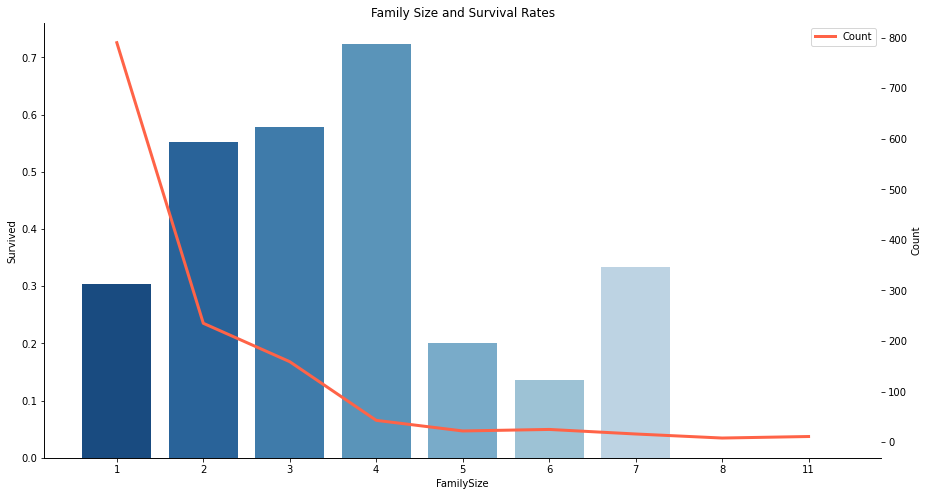

In [159]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

family_count_df = titanic_df['FamilySize'].value_counts().sort_index().reset_index(drop=True).reset_index()
labels_df = titanic_df[["FamilySize","Survived"]].sort_values(by="FamilySize").reset_index(drop=True)

ax = sns.barplot(x = 'FamilySize', y = 'Survived', data = labels_df, palette = 'Blues_r',ci=False)
ax2 = ax.twinx()
sns.lineplot(data=family_count_df, x="index", y="FamilySize",ax=ax2, color = "tomato",linewidth = 3)
plt.ylabel("Count")
plt.title("Family Size and Survival Rates")
plt.legend(labels=['Count'])
sns.despine()

### Alone

In [160]:
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

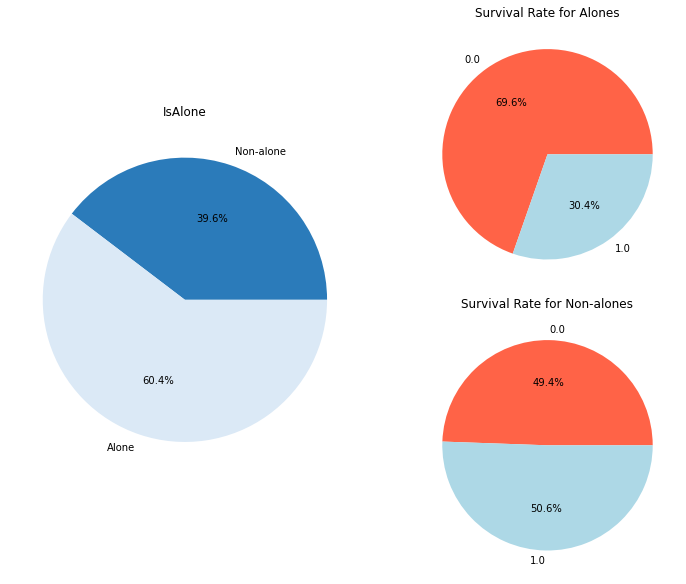

In [164]:
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(2, 3)
f1_ax1 = fig.add_subplot(gs[:, 0])
f1_ax1.set_title('IsAlone')
f1_ax2 = fig.add_subplot(gs[0, 1])
f1_ax2.set_title('Survival Rate for Alones')
f1_ax3 = fig.add_subplot(gs[1, 1])
f1_ax3.set_title('Survival Rate for Non-alones')

colors = [sns.color_palette('Blues_r')[1],sns.color_palette('Blues_r')[-1]]
colors2 = ["tomato","lightblue"]

isalone_data = titanic_df['IsAlone'].value_counts().sort_index()
f1_ax1.pie(isalone_data.values,labels=["Non-alone","Alone"],autopct='%1.1f%%',colors = colors)

alone_data = titanic_df[titanic_df['IsAlone'] == 1]["Survived"].value_counts().sort_index()
f1_ax2.pie(alone_data.values,labels=alone_data.index,autopct='%1.1f%%', colors = colors2)

nonalone_data = titanic_df[titanic_df['IsAlone'] == 0]["Survived"].value_counts().sort_index()
f1_ax3.pie(nonalone_data.values,labels=nonalone_data.index,autopct='%1.1f%%', colors = colors2)

plt.show()

In [163]:
isalone_data

0    519
1    790
Name: IsAlone, dtype: int64

In [129]:
titanic_df.head()

Survived  Pclass                                               Name  \
0       0.0       3                            Braund, Mr. Owen Harris   
1       1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2       1.0       3                             Heikkinen, Miss. Laina   
3       1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4       0.0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500     N        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250     N        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500     N        S   

   Has_Cabin Cabin_label  
0          0           N  
1          1           C  
2          0           N  
3          1           C  
4          0           N